# Incidence de la varicelle

## Chargement des données

In [29]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import isoweek

On commence par récupérer les données depuis le site [Réseau Sentinelles](https://www.sentiweb.fr/france/fr/?) en naviguant dans le menu de gauche: `Surveillance continue`-> `Bases de données` puis `Accès aux données`. On sélectionne `Varicelle (1991 - en cours)` dans le menu déroulant intitulé `Maladie/Indicateur` puis, dans l'onglet `Télécharger` on prend soin de télécharger les données au format CSV afin de déterminer l'URL permettant d'accéder à ces données. Celle-ci est stockée sous la forme d'une chaîne de caractères dans la variable suivante:

In [30]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

La lecture des données brutes donne:

In [31]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202204          7  10102     6607   13597      15          10   
1     202203          7  14151    10799   17503      21          16   
2     202202          7   8495     6026   10964      13           9   
3     202201          7  13793    10597   16989      21          16   
4     202152          7  13239     9611   16867      20          15   
5     202151          7  13326     9629   17023      20          14   
6     202150          7  14128    10312   17944      21          15   
7     202149          7  13674    10369   16979      21          16   
8     202148          7  11549     8503   14595      17          12   
9     202147          7  11419     8376   14462      17          12   
10    202146          7   8216     5724   10708      12           8   
11    202145          7   8965     6468   11462      14          10   
12    202144          7   8736     5636   11836      13           8   
13    202143          7   8145     5164   11126      12           7   
14    202142          7   9443     6037   12849      14           9   
15    202141          7   4021     2239    5803       6           3   
16    202140          7   4441     2454    6428       7           4   
17    202139          7   2291     1056    3526       3           1   
18    202138          7   4325     2267    6383       7           4   
19    202137          7   1964      754    3174       3           1   
20    202136          7   3441     1730    5152       5           2   
21    202135          7   2562     1107    4017       4           2   
22    202134          7   1429      378    2480       2           0   
23    202133          7   3829     1830    5828       6           3   
24    202132          7   4108     1895    6321       6           3   
25    202131          7   4793     2301    7285       7           3   
26    202130          7   7190     4191   10189      11           6   
27    202129          7   6800     4109    9491      10           6   
28    202128          7   9734        0   21731      15           0   
29    202127          7   9026     4316   13736      14           7   
...      ...        ...    ...      ...     ...     ...         ...   
1596  199126          7  17608    11304   23912      31          20   
1597  199125          7  16169    10700   21638      28          18   
1598  199124          7  16171    10071   22271      28          17   
1599  199123          7  11947     7671   16223      21          13   
1600  199122          7  15452     9953   20951      27          17   
1601  199121          7  14903     8975   20831      26          16   
1602  199120          7  19053    12742   25364      34          23   
1603  199119          7  16739    11246   22232      29          19   
1604  199118          7  21385    13882   28888      38          25   
1605  199117          7  13462     8877   18047      24          16   
1606  199116          7  14857    10068   19646      26          18   
1607  199115          7  13975     9781   18169      25          18   
1608  199114          7  12265     7684   16846      22          14   
1609  199113          7   9567     6041   13093      17          11   
1610  199112          7  10864     7331   14397      19          13   
1611  199111          7  15574    11184   19964      27          19   
1612  199110          7  16643    11372   21914      29          20   
1613  199109          7  13741     8780   18702      24          15   
1614  199108          7  13289     8813   17765      23          15   
1615  199107          7  12337     8077   16597      22          15   
1616  199106          7  10877     7013   14741      19          12   
1617  199105          7  10442     6544   14340      18          11   
1618  199104          7   7913     4563   11263      14           8   
1619  199103          7  15387    10484   20290      27          18   
1620  199102          7  16277  

## Reformatage des données

Dans un premier temps, on vérifie s'il n'y a pas de lignes manquantes dans le tableau ci-dessus:

In [32]:
missing_lines = raw_data[raw_data.isnull().any(axis=1)]
missing_lines

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

On voit que la variable `missing_lines` est vide, ce qui indique que le jeux de données ne souffre pas de "trous". On copie le jeu de données dans une nouvelle variable, qui est celle sur laquelle les traitements seront effectués:

In [33]:
data = raw_data

Ensuite, on reformule la numérotation des semaines. En effet, dans le tableau ci-dessus, les semaines sont numérotées avec six chiffres: les quatres premiers chiffres correspondent à l'année, et les deux derniers au numéro de la semaine, ce qui donne l'impression à `pandas` qu'il s'agit d'un entier alors que ce n'est pas le cas. De plus, une telle numérotation ne peut pas être interprétée par `pandas`, il faut donc la reformuler. Cela est réalisé avec la librairie `isoweek`. On écrit une fonction `conversionDate`qui sera appliquée à l'ensemble de la première colonne du jeu de données:

In [34]:
def conversionDate(dateInt):
    
    dateStr = str(dateInt)
    annee = int(dateStr[:4])
    semaine = int(dateStr[4:])
    s = isoweek.Week(annee, semaine)
    return pd.Period(s.day(0), 'W')

In [35]:
data["period"] = data["week"].apply(conversionDate)
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202204          7  10102     6607   13597      15          10   
1     202203          7  14151    10799   17503      21          16   
2     202202          7   8495     6026   10964      13           9   
3     202201          7  13793    10597   16989      21          16   
4     202152          7  13239     9611   16867      20          15   
5     202151          7  13326     9629   17023      20          14   
6     202150          7  14128    10312   17944      21          15   
7     202149          7  13674    10369   16979      21          16   
8     202148          7  11549     8503   14595      17          12   
9     202147          7  11419     8376   14462      17          12   
10    202146          7   8216     5724   10708      12           8   
11    202145          7   8965     6468   11462      14          10   
12    202144          7   8736     5636   11836      13           8   
13    202143          7   8145     5164   11126      12           7   
14    202142          7   9443     6037   12849      14           9   
15    202141          7   4021     2239    5803       6           3   
16    202140          7   4441     2454    6428       7           4   
17    202139          7   2291     1056    3526       3           1   
18    202138          7   4325     2267    6383       7           4   
19    202137          7   1964      754    3174       3           1   
20    202136          7   3441     1730    5152       5           2   
21    202135          7   2562     1107    4017       4           2   
22    202134          7   1429      378    2480       2           0   
23    202133          7   3829     1830    5828       6           3   
24    202132          7   4108     1895    6321       6           3   
25    202131          7   4793     2301    7285       7           3   
26    202130          7   7190     4191   10189      11           6   
27    202129          7   6800     4109    9491      10           6   
28    202128          7   9734        0   21731      15           0   
29    202127          7   9026     4316   13736      14           7   
...      ...        ...    ...      ...     ...     ...         ...   
1596  199126          7  17608    11304   23912      31          20   
1597  199125          7  16169    10700   21638      28          18   
1598  199124          7  16171    10071   22271      28          17   
1599  199123          7  11947     7671   16223      21          13   
1600  199122          7  15452     9953   20951      27          17   
1601  199121          7  14903     8975   20831      26          16   
1602  199120          7  19053    12742   25364      34          23   
1603  199119          7  16739    11246   22232      29          19   
1604  199118          7  21385    13882   28888      38          25   
1605  199117          7  13462     8877   18047      24          16   
1606  199116          7  14857    10068   19646      26          18   
1607  199115          7  13975     9781   18169      25          18   
1608  199114          7  12265     7684   16846      22          14   
1609  199113          7   9567     6041   13093      17          11   
1610  199112          7  10864     7331   14397      19          13   
1611  199111          7  15574    11184   19964      27          19   
1612  199110          7  16643    11372   21914      29          20   
1613  199109          7  13741     8780   18702      24          15   
1614  199108          7  13289     8813   17765      23          15   
1615  199107          7  12337     8077   16597      22          15   
1616  199106          7  10877     7013   14741      19          12   
1617  199105          7  10442     6544   14340      18          11   
1618  199104          7   7913     4563   11263      14           8   
1619  199103          7  15387    10484   20290      27          18   
1620  199102          7  16277  

Ensuite, on définit la colonne nouvellement créée comme le nouvel index de nos données:

In [36]:
data = data.set_index("period")

Puis on trie les données par ordre chronologique:

In [37]:
data = data.sort_index()
data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2021-07-05/2021-07-11  202127          7   9026     4316   13736      14   
2021-07-12/2021-07-18  202128          7   9734        0   21731      15   
2021-07-19/2021-07-25  202129          7   6800     4109    9491      10   
2021-07-26/2021-08-01  202130          7   7190     4191   10189      11   
2021-08-02/2021-08-08  202131          7   4793     2301    7285       7   
2021-08-09/2021-08-15  202132          7   4108     1895    6321       6   
2021-08-16/2021-08-22  202133          7   3829     1830    5828       6   
2021-08-23/2021-08-29  202134          7   1429      378    2480       2   
2021-08-30/2021-09-05  202135          7   2562     1107    4017       4   
2021-09-06/2021-09-12  202136          7   3441     1730    5152       5   
2021-09-13/2021-09-19  202137          7   1964      754    3174       3   
2021-09-20/2021-09-26  202138          7   4325     2267    6383       7   
2021-09-27/2021-10-03  202139          7   2291     1056    3526       3   
2021-10-04/2021-10-10  202140          7   4441     2454    6428       7   
2021-10-11/2021-10-17  202141          7   4021     2239    5803       6   
2021-10-18/2021-10-24  202142          7   9443     6037   12849      14   
2021-10-25/2021-10-31  202143          7   8145     5164   11126      12   
2021-11-01/2021-11-07  202144          7   8736     5636   11836      13   
2021-11-08/2021-11-14  202145          7   8965     6468   11462      14   
2021-11-15/2021-11-21  202146          7   8216     5724   10708      12 

On vérifie ensuite la cohérence des données, en regardant si deux lignes consécutives de la table correspondent bien à deux périodes consécutives. Pour cela, on mesure l'écart temporel entre les périodes de des lignes successives de la table:

In [38]:
periods = data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Il n'y a pas d'incohérence à priori. On trace l'évolution de l'incidence:

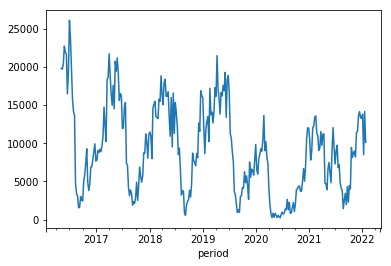

In [39]:
data['inc'][-300:].plot()

## Etude de l'incidence annuelle

Les plus grosses incidences semblent avoir généralement lieu en début d'année civile. Afin d'étudier l'incidence annuelle, on se place donc dans des "creux", c'est-à-dire des périodes où peu de cas sont observables. Cela permet de limiter les erreurs introduites par le découpages des données en périodes. Ainsi, on définit la période de référence entre le 1er Septembre de l'année $N$ et le 1er Septembre de l'année suivante.
A noter que les données sont disponibles à partir de début Décembre 1990, on laisse donc cette année de côté pour travailler avec des années complètes.

In [40]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    data.index[-1].year)]

Et enfin on détermine l'incidence annuelle, l'année étant défiie comme ci-dessus:

In [41]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Affichage sous la forme de graphe:

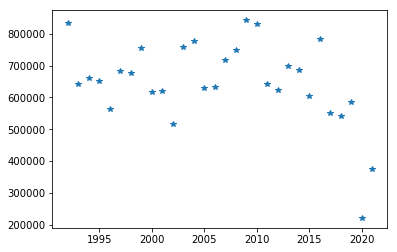

In [42]:
yearly_incidence.plot(style='*')

Et sous la forme d'une table triée:

In [43]:
yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64